# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

import numpy as np

Let's generate our dataset and take a look on it.

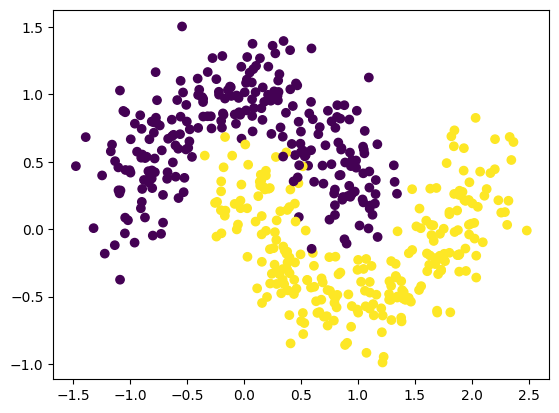

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
!pip install mlxtend --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


Logistic Regression Accuracy: 0.8560
SVM (Linear) Accuracy:        0.8580


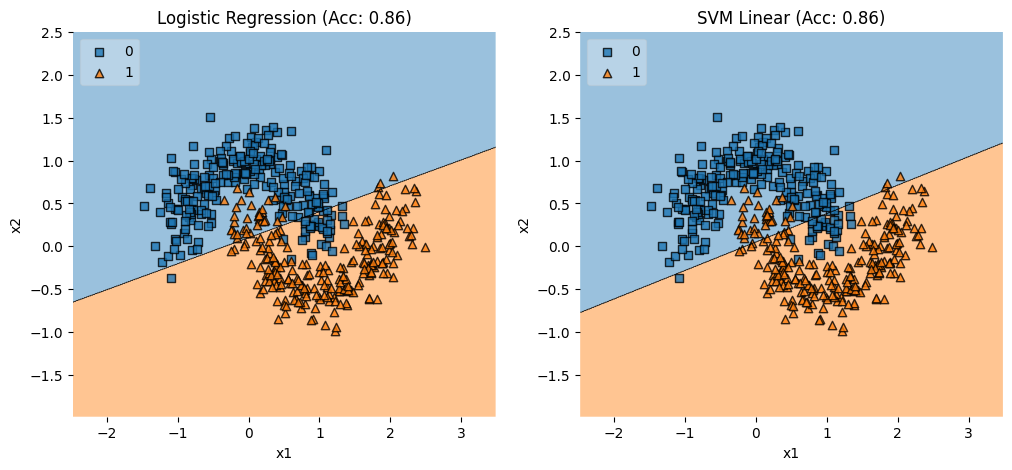

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

def plot_decisions(X, y, estimator, title):
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')

lr = LogisticRegression(random_state=42)
lr.fit(moons_points, moons_labels)

svm = SVC(kernel='linear', random_state=42)
svm.fit(moons_points, moons_labels)

lr_acc = accuracy_score(moons_labels, lr.predict(moons_points))
svm_acc = accuracy_score(moons_labels, svm.predict(moons_points))

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"SVM (Linear) Accuracy:        {svm_acc:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decisions(moons_points, moons_labels, lr, f"Logistic Regression (Acc: {lr_acc:.2f})")

plt.subplot(1, 2, 2)
plot_decisions(moons_points, moons_labels, svm, f"SVM Linear (Acc: {svm_acc:.2f})")

plt.show()

Because the dataset is non-linear both Logistic Regression and the Linear SVM fail to separate the data effectively. They are forced to draw a straight line through the data, resulting in significant underfitting and misclassification of the tips of the moons.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

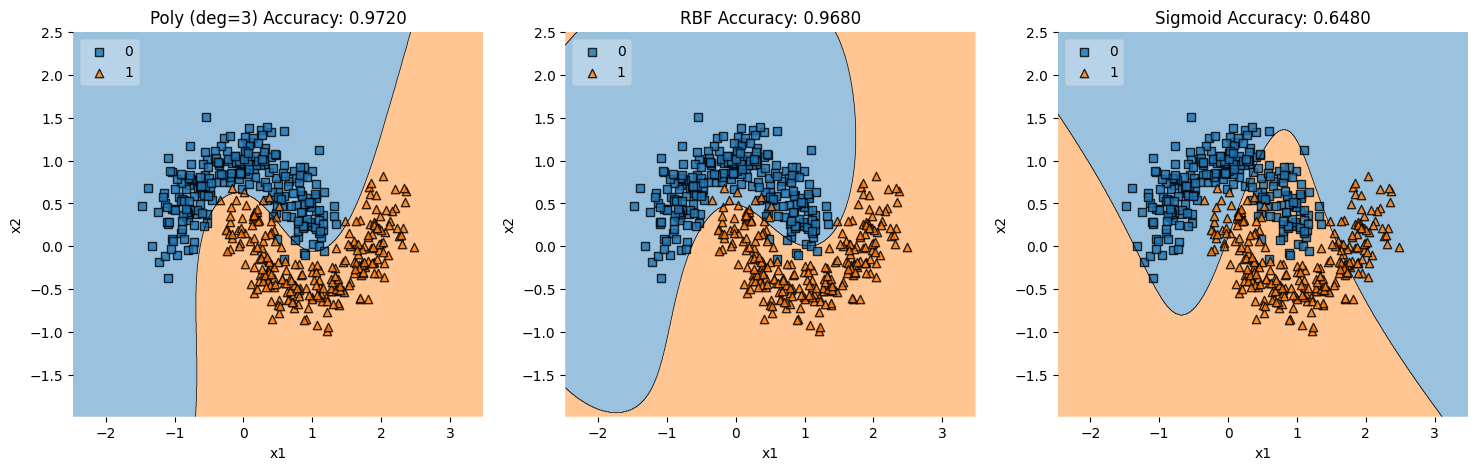

In [6]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0, coef0=1, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)
svm_sigmoid = SVC(kernel='sigmoid', C=1.0, coef0=0, random_state=42)

models = [
    ('Poly (deg=3)', svm_poly),
    ('RBF', svm_rbf),
    ('Sigmoid', svm_sigmoid)
]

plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models):
    model.fit(moons_points, moons_labels)
    
    y_pred = model.predict(moons_points)
    acc = accuracy_score(moons_labels, y_pred)
    
    plt.subplot(1, 3, i+1)
    plot_decisions(moons_points, moons_labels, model, f"{name} Accuracy: {acc:.4f}")

plt.show()

1. Switching to non-linear kernels boosted accuracy from ~86% to nearly 100% because they can capture complex shapes. Sigmoid performed poorly as it is ill-suited for this specific data topology without heavy tuning.

2. Poly: Formed a smooth, curved boundary effectively separating the crescents.
    
    RBF: Almost the same like Poly. 

    Sigmoid: Resulted in a nearly linear or distorted boundary that failed to separate the classes.

3. I chose degree=3. This is the minimum degree required to create the S-shaped boundary needed to separate the interleaving moons. degree=1 creates a line and degree=2 creates a parabola, neither of which is sufficient.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Logistic Regression with Poly Features Accuracy: 0.9640


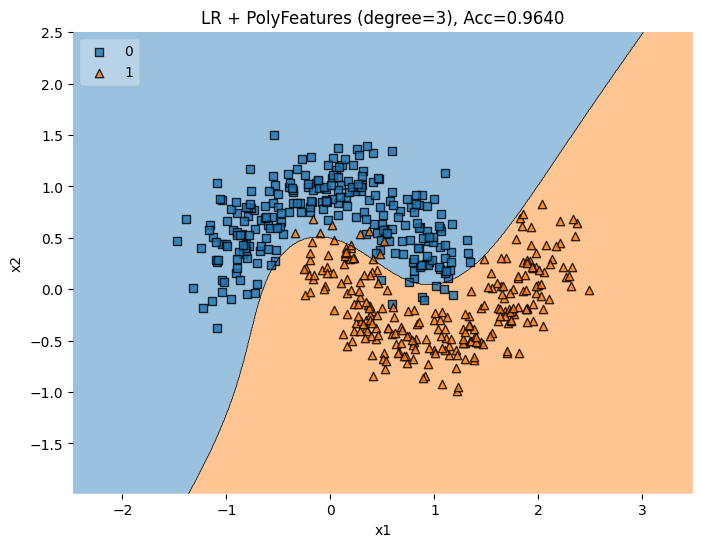

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('clf', LogisticRegression(random_state=42, solver='liblinear')) 
])

poly_pipeline.fit(moons_points, moons_labels)

y_pred = poly_pipeline.predict(moons_points)
acc = accuracy_score(moons_labels, y_pred)

print(f"Logistic Regression with Poly Features Accuracy: {acc:.4f}")

plt.figure(figsize=(8, 6))
plot_decisions(moons_points, moons_labels, poly_pipeline, 
               f"LR + PolyFeatures (degree=3), Acc={acc:.4f}")
plt.show()

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

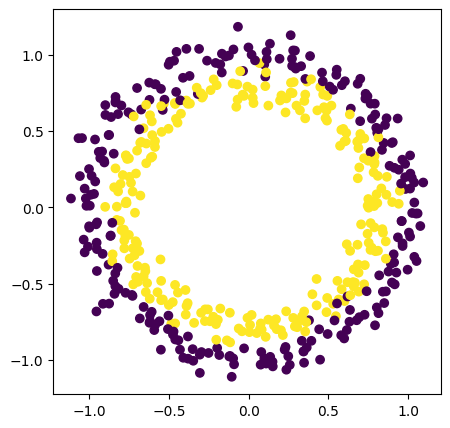

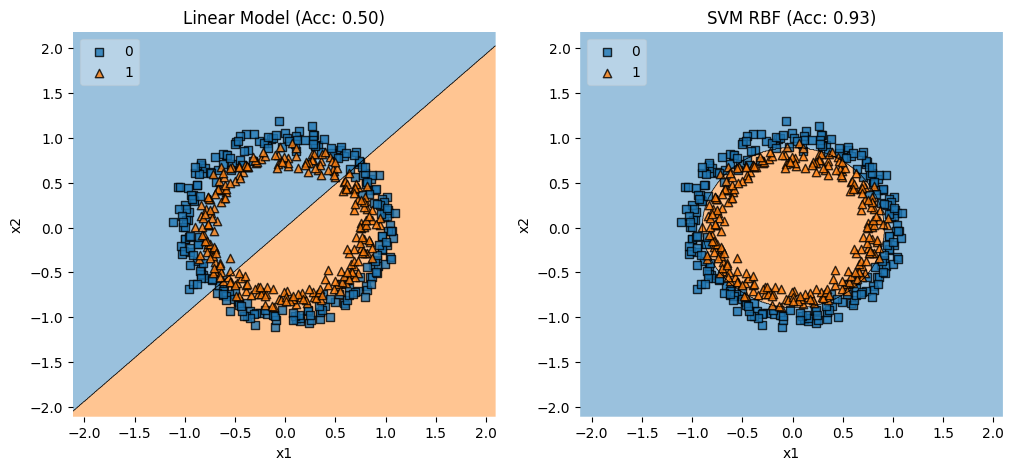

In [9]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(circles_points, circles_labels)

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(circles_points, circles_labels)

lr_acc = accuracy_score(circles_labels, lr.predict(circles_points))
rbf_acc = accuracy_score(circles_labels, svm_rbf.predict(circles_points))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decisions(circles_points, circles_labels, lr, f"Linear Model (Acc: {lr_acc:.2f})")

plt.subplot(1, 2, 2)
plot_decisions(circles_points, circles_labels, svm_rbf, f"SVM RBF (Acc: {rbf_acc:.2f})")

plt.show()

And even more:

/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


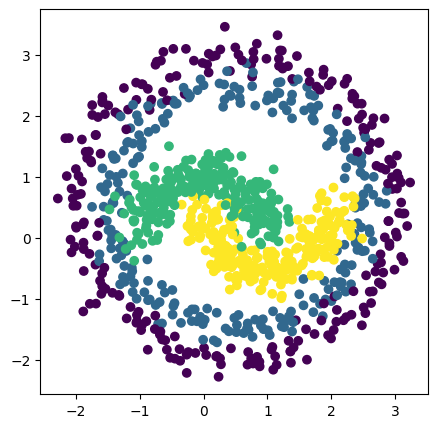

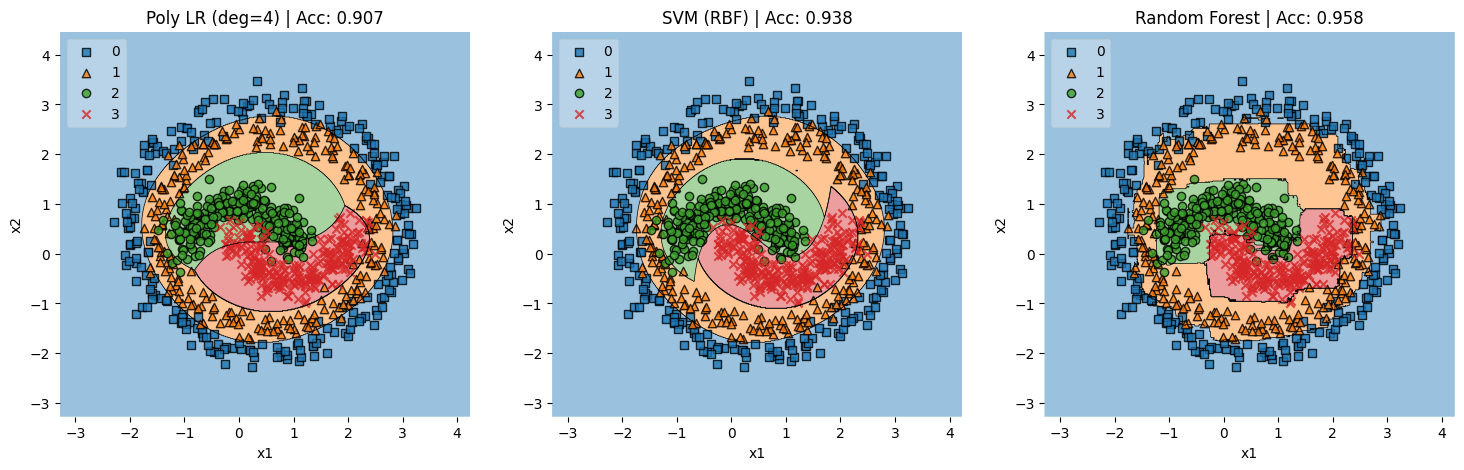

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) 

lr_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()), 
    ('clf', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
])

svm_rbf = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

models_to_test = [
    ("Poly LR (deg=4)", lr_pipeline),
    ("SVM (RBF)", svm_rbf),
    ("Random Forest", rf_model)
]

plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models_to_test):
    model.fit(points, labels)
    
    y_pred = model.predict(points)
    acc = accuracy_score(labels, y_pred)
    
    plt.subplot(1, 3, i + 1)
    plot_decisions(points, labels, model, f"{name} | Acc: {acc:.3f}")

plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Model A: Logistic Regression with Poly Features. We need at least degree 4 because the shapes are complex and disjoint.

Model B: SVM with RBF Kernel. RBF is ideal here because it works based on proximity, easily separating the inner circle from the outer ring and the distant moons.

Model C: Random Forest. It fits decision trees to rectangular subspaces. Take this with max_depth = 10.


/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


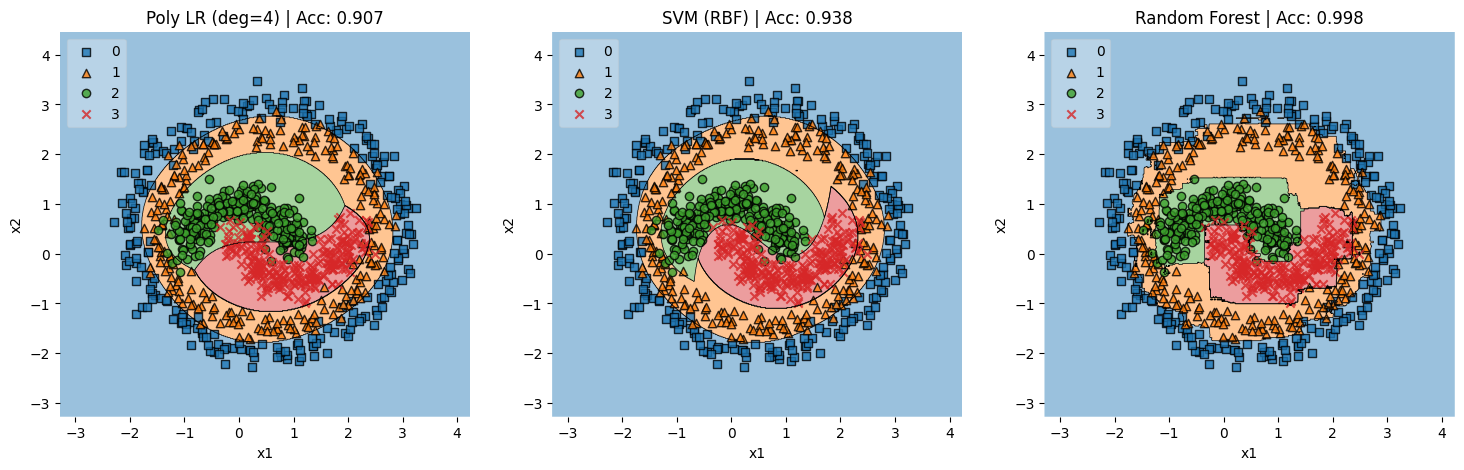

In [ ]:

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  

lr_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42))
])

svm_rbf = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

models_to_test = [
    ("Poly LR (deg=4)", lr_pipeline),
    ("SVM (RBF)", svm_rbf),
    ("Random Forest", rf_model)
]

plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models_to_test):
    model.fit(points, labels)
    
    y_pred = model.predict(points)
    acc = accuracy_score(labels, y_pred)
    
    plt.subplot(1, 3, i + 1)
    plot_decisions(points, labels, model, f"{name} | Acc: {acc:.3f}")

plt.show()

Logistic Regression with Poly Features (Degree=4): It work okay but suffer with complex shape. You can see curves is wobbly, not fit good between inner moons and ring. (acc: 0.907)

SVM with RBF Kernel: This model perform much better. RIt isolate inner circle and make separate zones for moons very nice. Boundaries is smooth and hug points tight, better than polynomial regression. (acc: 0.938)

Random Forest: This is best result, almost perfect. Because it use trees, it not care about smooth math curves. It cut space into rectangle boxes. This let it separate complex nested shapes easy without need feature scaling.